# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
import logisticRegression

# Generate some nice data

In [3]:
X_blue = np.linspace(5, 8, 50).reshape(50, 1)
X_red = np.linspace(7, 10, 50).reshape(50, 1)
X = np.concatenate((X_blue, X_red))
X_ones = np.concatenate((X, np.ones(shape=(X.shape[0], 1))), axis=1)
y = np.concatenate((np.zeros(50), np.ones(50)))

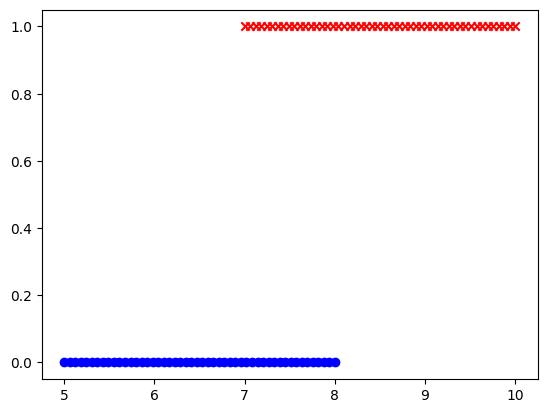

In [4]:
plt.scatter(X_blue, np.zeros(50), marker='o', color='blue')
plt.scatter(X_red, np.ones(50), marker='x', color='red')

plt.show()

## Fit logistic regression

In [6]:
importlib.reload(logisticRegression)

lr = logisticRegression.StochasticGradientDescent(1e-4, 1e-4)
lr.fit(X_ones, y, print_norm=False)

In [6]:
lr.info()

array([  1.49856361, -11.14208679])

## Plot resulting model

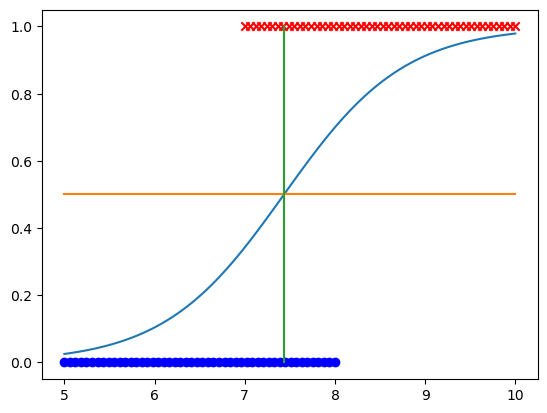

In [7]:
plt.scatter(X_blue, np.zeros(50), marker='o', color='blue')
plt.scatter(X_red, np.ones(50), marker='x', color='red')

domain = np.linspace(5, 10, 100).reshape(100, 1)
y_domain = lr.pred(np.concatenate((domain, np.ones(shape=(domain.shape[0], 1))), axis=1))
plt.plot(domain, y_domain)
plt.plot(domain, np.ones(domain.shape[0]) * 0.5)
plt.plot(-(np.ones(2)) * (lr.info()[1] / lr.info()[0]), np.array([0, 1]))

plt.show()

In [8]:
-lr.info()[1] / lr.info()[0]

7.435177714873856

# Real dataset

In [7]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [8]:
new_df = df.loc[:, df.columns != 'competitorname']
new_df = new_df.dropna()
new_df.drop
X_candy = np.array(new_df.loc[:, new_df.columns != 'chocolate'])
X_candy = (X_candy - np.amin(X_candy, axis=0).reshape(1, X_candy.shape[1])) / \
    ( np.amax(X_candy, axis=0).reshape(1, X_candy.shape[1]) - np.amin(X_candy, axis=0).reshape(1, X_candy.shape[1]))
y_candy = np.array(new_df.loc[:, new_df.columns == 'chocolate'])

train_count = int(X_candy.shape[0] * 0.8)

X_train = X_candy[:train_count, :]
X_test = X_candy[train_count:, :]
y_train = y_candy[:train_count, :].flatten()
y_test = y_candy[train_count:, :].flatten()

In [9]:
cake_lr = logisticRegression.StochasticGradientDescent(1e-4, 1e-4)
cake_lr.fit(X_train, y_train, print_norm=False)
cake_lr.info()

array([-4.23446007,  1.26569614,  0.03260935, -0.75427864,  0.59378856,
       -1.36207141,  1.13036398, -0.55781196, -0.39874844,  0.70795194,
        2.34596753])

## Evaluate precision

In [10]:
y_test_pred = cake_lr.pred(X_test)
idx = y_test_pred < 0.5
y_test_pred[idx] = 0
y_test_pred[~idx] = 1

print(f'Precision: {1 - np.sum(np.abs(y_test_pred - y_test)) / y_test_pred.shape[0]}')

Precision: 0.7647058823529411
